In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

!pip install imblearn
from imblearn.over_sampling import ADASYN

In [2]:
# Import trainset
trainset = pd.read_csv("PB5_trainset.csv")
trainset.describe()

,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachType,BeachDirection,Entero_level,Wspeed_level,Wdirection_level,on_offshore
count,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000
mean,125.903084,1.884796,4.148640,6.578678,12.612115,187.495595,2.641189,6.729075,0.477423,3.962555,0.064427,1.007709,7.985683,0.869493
std,894.696898,5.334074,9.024765,12.162776,24.039501,90.964819,1.596487,3.844990,0.499628,4.816492,0.245580,0.093573,4.072729,0.862462
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,112.750000,1.500000,3.500000,0.000000,1.000000,0.000000,1.000000,5.000000,0.000000
50%,10.000000,0.000000,0.460000,1.375000,2.355000,209.000000,2.400000,7.200000,0.000000,2.000000,0.000000,1.000000,9.000000,1.000000
75%,20.000000,0.830000,4.000000,7.447500,14.315000,252.000000,3.325000,10.000000,1.000000,2.000000,0.000000,1.000000,11.000000,2.000000
max,24000.000000,57.080000,115.250000,127.320000,251.620000,360.000000,12.100000,14.100000,1.000000,15.000000,1.000000,2.000000,15.000000,2.000000


In [3]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              1816 non-null   object 
 1   Entero            1816 non-null   float64
 2   Rain24            1816 non-null   float64
 3   Rain48            1816 non-null   float64
 4   Rain72            1816 non-null   float64
 5   RainWA            1816 non-null   float64
 6   Wdirection        1816 non-null   int64  
 7   Wspeed            1816 non-null   float64
 8   Solarhours        1816 non-null   float64
 9   BeachName         1816 non-null   object 
 10  BeachType         1816 non-null   int64  
 11  BeachDirection    1816 non-null   int64  
 12  Entero_level      1816 non-null   int64  
 13  Wspeed_level      1816 non-null   int64  
 14  Wdirection_level  1816 non-null   int64  
 15  on_offshore       1816 non-null   int64  
dtypes: float64(7), int64(7), object(2)
memory 

In [4]:
# trainset['DATE']=trainset['DATE'].astype('datetime64')

In [5]:
# Delete columns "DATE","Entero","BeachName"
data_frame = trainset.drop(columns=['Entero','DATE','BeachName'])
# Move column "Entero_level" to the front
data_frame = data_frame[ ['Entero_level'] + [ col for col in data_frame.columns if col != 'Entero_level' ] ]
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entero_level      1816 non-null   int64  
 1   Rain24            1816 non-null   float64
 2   Rain48            1816 non-null   float64
 3   Rain72            1816 non-null   float64
 4   RainWA            1816 non-null   float64
 5   Wdirection        1816 non-null   int64  
 6   Wspeed            1816 non-null   float64
 7   Solarhours        1816 non-null   float64
 8   BeachType         1816 non-null   int64  
 9   BeachDirection    1816 non-null   int64  
 10  Wspeed_level      1816 non-null   int64  
 11  Wdirection_level  1816 non-null   int64  
 12  on_offshore       1816 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 184.6 KB


In [6]:
###KNN with original unbalanced dataset
print("KNN model with original unbalanced dataset----")
print("input data -", end =" ")
input_data = data_frame.drop(columns=['Entero_level'])
print(input_data.columns.values)
entero_data = data_frame.iloc[:,0]

# Split the data randomly - 70% train set, 30% test set
trainset_data, testset_data, trainset_labels, testset_labels = train_test_split(input_data, entero_data, test_size=0.3, random_state=42)

# Train data normalization
sc = preprocessing.Normalizer().fit(trainset_data)
trainset_data = sc.transform(trainset_data)
testset_data = sc.transform(testset_data)

# Run KNN with sklearn
knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
knn.fit(trainset_data, trainset_labels)

# Show the KNN result
cm1 = confusion_matrix(testset_labels,knn.predict(testset_data))
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

KNN model with original unbalanced dataset----
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType' 'BeachDirection' 'Wspeed_level' 'Wdirection_level'
 'on_offshore']
Confusion Matrix : 
 [[506   8]
 [ 30   1]]
Accuracy :  0.9302752293577982
Sensitivity :  0.03225806451612903
Specificity :  0.9844357976653697


KNN (n=5) model with ADASYN (n=10) balanced data original columns ----
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours']
Overall accuracy :  0.7911440677966103
Sensitivity :  0.9416239316239314
Specificity :  0.6431932773109245


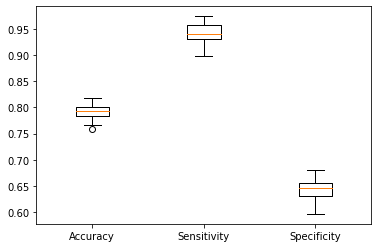

In [8]:
### KNN with ADASYN balanced data-original columns (Rain24, Rain48, Rain72, RainWA, Wdirection, Wspeed, Solarhours)
print("KNN (n=5) model with ADASYN (n=10) balanced data original columns ----")
print("input data -", end =" ")
input_data = data_frame.drop(columns=['Entero_level','BeachType','BeachDirection','Wspeed_level','Wdirection_level','on_offshore'])
entero_data = data_frame['Entero_level']
c = input_data.columns
print(input_data.columns.values)
# Separate real above and real below data
index_above = (data_frame['Entero_level']==1)
index_below = (data_frame['Entero_level']==0)
input_real_above_data = data_frame[index_above]
input_real_below_data = data_frame[index_below]

# Use real above data form testset above data
testset_above_data = input_real_above_data.drop(columns=['Entero_level','BeachType','BeachDirection','Wspeed_level','Wdirection_level','on_offshore'])
water_above_label = input_real_above_data['Entero_level']

# Calculate ratio for train/test for real below data
len_testset = len(input_real_above_data)
ratio = round(len_testset/len(input_real_below_data),2)

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# For loop
j=np.zeros(100)
sen=np.zeros(100)
spe=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=input_data.columns)
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:-1]
    water_fake_label = data_fake_frame.iloc[:,-1]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.drop(columns=['Entero_level','BeachType','BeachDirection','Wspeed_level','Wdirection_level','on_offshore'])
    entero_real_data = input_real_below_data.iloc[:,0]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    sc = preprocessing.Normalizer().fit(trainset_data)
    trainset_data = sc.transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    #j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    cm1 = confusion_matrix(testset_labels,knn.predict(testset_data))
    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    j[i] = (cm1[0,0]+cm1[1,1])/total1
    sen[i] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    spe[i] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    i=i+1

#End of loop

# Show the KNN result
print ('Overall accuracy : ', j.mean())
print('Sensitivity : ', sen.mean())
print('Specificity : ', spe.mean())
plt.boxplot([j, sen, spe])
plt.xticks([1, 2, 3], ["Accuracy","Sensitivity", "Specificity"])
plt.show()


KNN (n=5) model with ADASYN (n=10) balanced data full columns----
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType' 'BeachDirection' 'Wspeed_level' 'Wdirection_level'
 'on_offshore']
Overall accuracy :  0.8322033898305083
Sensitivity :  0.9664102564102564
Specificity :  0.7002521008403362


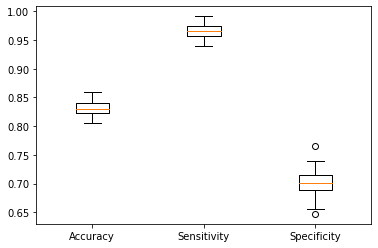

In [9]:
### KNN with ADASYN balanced data
print("KNN (n=5) model with ADASYN (n=10) balanced data full columns----")
print("input data -", end =" ")
input_data = data_frame.drop(columns=['Entero_level'])
entero_data = data_frame['Entero_level']
c = input_data.columns
print(input_data.columns.values)
# Separate real above and real below data
index_above = (data_frame['Entero_level']==1)
index_below = (data_frame['Entero_level']==0)
input_real_above_data = data_frame[index_above]
input_real_below_data = data_frame[index_below]

# Use real above data form testset above data
testset_above_data = input_real_above_data.drop(columns=['Entero_level'])
water_above_label = input_real_above_data['Entero_level']

# Calculate ratio for train/test for real below data
len_testset = len(input_real_above_data)
ratio = round(len_testset/len(input_real_below_data),2)

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# For loop
j=np.zeros(100)
sen=np.zeros(100)
spe=np.zeros(100)
for i in range(100):
    # Generate synthetic sampling data with ADASYN
    data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
    x=pd.DataFrame(data_fake, columns=input_data.columns)
    y=pd.DataFrame(entero_fake, columns=['Entero_level'])
    x['Entero_level']=y['Entero_level'].values
    data_fake_frame=x.query("Entero_level == 1")
    data_fake_frame=data_fake_frame.reset_index(drop=True)
    data_fake_frame.describe()
    
    # Use synthetic data to form trainset above data
    input_fake_data = data_fake_frame.iloc[:,0:-1]
    water_fake_label = data_fake_frame.iloc[:,-1]
    
    # Split the real below data randomly - test set size matches real above data size
    input_real_data = input_real_below_data.drop(columns=['Entero_level'])
    entero_real_data = input_real_below_data.iloc[:,0]
    trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
    # Use fake above data plus real below data to form trainset
    trainset_data = np.vstack((input_fake_data, trainset_below_data))
    trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
    # Use real above data plus same amount of real below data to form testset
    testset_data = np.vstack((testset_above_data, testset_below_data))
    testset_labels = np.hstack((water_above_label, testset_below_labels))
    
    # Train data normalization
    sc = preprocessing.Normalizer().fit(trainset_data)
    trainset_data = sc.transform(trainset_data)
    testset_data = sc.transform(testset_data)
    
    # Run KNN with sklearn
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
    knn.fit(trainset_data, trainset_labels)
    #j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
    cm1 = confusion_matrix(testset_labels,knn.predict(testset_data))
    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    j[i] = (cm1[0,0]+cm1[1,1])/total1
    sen[i] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    spe[i] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    i=i+1

#End of loop

# Show the KNN result
print ('Overall accuracy : ', j.mean())
print('Sensitivity : ', sen.mean())
print('Specificity : ', spe.mean())
plt.boxplot([j, sen, spe])
plt.xticks([1, 2, 3], ["Accuracy","Sensitivity", "Specificity"])
plt.show()


KNN (n=5) model with ADASYN (n=10) balanced data----
Drop: Rain24
input data - ['Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8316525423728813
Sensitivity :  0.9652136752136751
Specificity :  0.7003361344537816


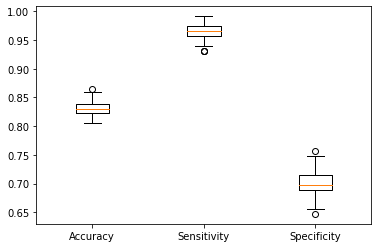

Drop: Rain48
input data - ['Rain24' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8352118644067797
Sensitivity :  0.9645299145299145
Specificity :  0.7080672268907564


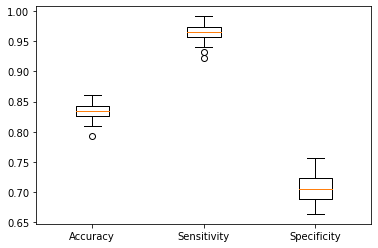

Drop: Rain72
input data - ['Rain24' 'Rain48' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8258898305084746
Sensitivity :  0.9625641025641026
Specificity :  0.6915126050420167


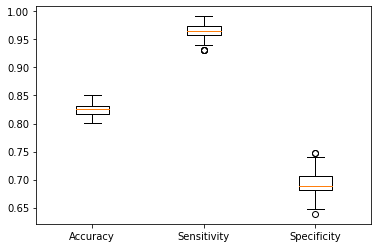

Drop: RainWA
input data - ['Rain24' 'Rain48' 'Rain72' 'Wdirection' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8241101694915254
Sensitivity :  0.9608547008547008
Specificity :  0.6896638655462184


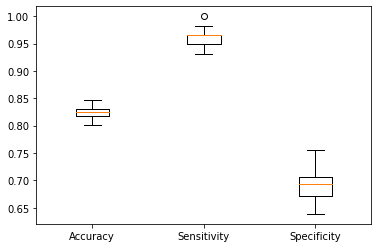

Drop: Wdirection
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8291101694915254
Sensitivity :  0.9684615384615384
Specificity :  0.6921008403361345


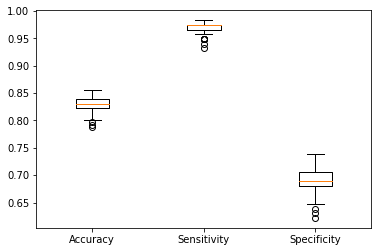

Drop: Wspeed
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8067796610169492
Sensitivity :  0.9317094017094018
Specificity :  0.6839495798319328


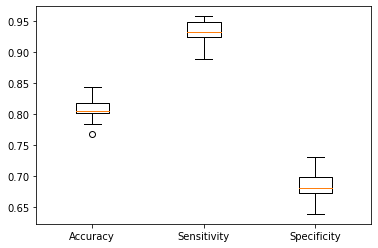

Drop: Solarhours
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8237711864406778
Sensitivity :  0.9023931623931624
Specificity :  0.7464705882352941


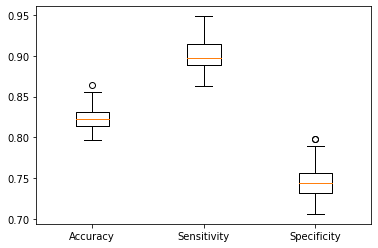

Drop: BeachType
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8328813559322034
Sensitivity :  0.9605128205128204
Specificity :  0.7073949579831933


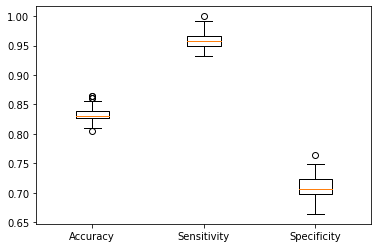

Drop: BeachDirection
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8003389830508476
Sensitivity :  0.9558974358974358
Specificity :  0.6473949579831934


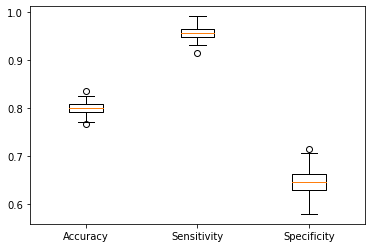

Drop: Wspeed_level
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType' 'BeachDirection' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.826822033898305
Sensitivity :  0.9627350427350426
Specificity :  0.6931932773109244


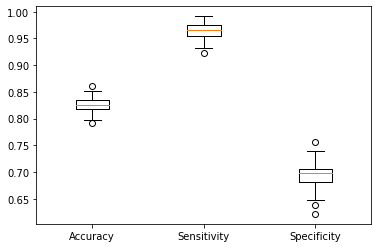

Drop: Wdirection_level
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType' 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.8323305084745763
Sensitivity :  0.9684615384615384
Specificity :  0.6984873949579833


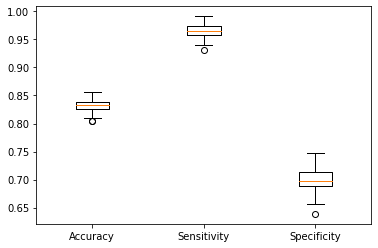

Drop: on_offshore
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wdirection' 'Wspeed' 'Solarhours'
 'BeachType' 'BeachDirection' 'Wspeed_level' 'Wdirection_level']
Overall accuracy :  0.8165254237288138
Sensitivity :  0.9564102564102563
Specificity :  0.6789915966386556


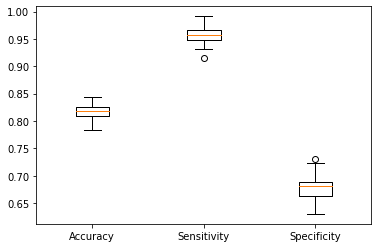

Best sensitivity:  0.9684615384615384 after drop  ['Wdirection']
Best accuracy:  0.8352118644067797 after drop  ['Rain48']


In [8]:
### KNN with ADASYN balanced data - drop one parameter each time to compare
print("KNN (n=5) model with ADASYN (n=10) balanced data----")
best_sen_drop=[]
best_acc_drop=[]
best_acc=j.mean()
best_sen=sen.mean()
for col in c:
    print("Drop:", col)
    input_data = data_frame.drop(columns=[str(col),'Entero_level'])
    entero_data = data_frame['Entero_level']
    print("input data -", end =" ")
    print(input_data.columns.values)
    # Separate real above and real below data
    index_above = (data_frame['Entero_level']==1)
    index_below = (data_frame['Entero_level']==0)
    input_real_above_data = data_frame[index_above]
    input_real_below_data = data_frame[index_below]

    # Use real above data form testset above data
    testset_above_data = input_real_above_data.drop(columns=['Entero_level',str(col)])
    water_above_label = input_real_above_data.iloc[:,0]
    
    # ADASYN
    ada = ADASYN(sampling_strategy=1, n_neighbors=10)

    # For loop
    j=np.zeros(100)
    sen=np.zeros(100)
    spe=np.zeros(100)
    for i in range(100):
        # Generate synthetic sampling data with ADASYN
        data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
        x=pd.DataFrame(data_fake, columns=input_data.columns)
        y=pd.DataFrame(entero_fake, columns=['Entero_level'])
        x['Entero_level']=y['Entero_level'].values
        data_fake_frame=x.query("Entero_level == 1")
        data_fake_frame=data_fake_frame.reset_index(drop=True)
        #data_fake_frame.describe()
    
        # Use synthetic data to form trainset above data
        input_fake_data = data_fake_frame.iloc[:,0:-1]
        water_fake_label = data_fake_frame.iloc[:,-1]
    
        # Split the real below data randomly - test set size matches real above data size
        input_real_data = input_real_below_data.drop(columns=['Entero_level',str(col)])
        entero_real_data = input_real_below_data.iloc[:,0]
        trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
        # Use fake above data plus real below data to form trainset
        trainset_data = np.vstack((input_fake_data, trainset_below_data))
        trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
    
        # Use real above data plus same amount of real below data to form testset
        testset_data = np.vstack((testset_above_data, testset_below_data))
        testset_labels = np.hstack((water_above_label, testset_below_labels))
    
        # Train data normalization
        sc = preprocessing.Normalizer().fit(trainset_data)
        trainset_data = sc.transform(trainset_data)
        testset_data = sc.transform(testset_data)
    
        # Run KNN with sklearn
        knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
        knn.fit(trainset_data, trainset_labels)
        #j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
        cm1 = confusion_matrix(testset_labels,knn.predict(testset_data))
        total1=sum(sum(cm1))
        #####from confusion matrix calculate accuracy
        j[i] = (cm1[0,0]+cm1[1,1])/total1
        sen[i] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        spe[i] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        i=i+1

    #End of loop

    # Show the KNN result
    print ('Overall accuracy : ', j.mean())
    print('Sensitivity : ', sen.mean())
    print('Specificity : ', spe.mean())
    if sen.mean()>best_sen:
        best_sen=sen.mean()
        best_sen_drop=[col]
    if j.mean()>best_acc:
        best_acc=j.mean()
        best_acc_drop=[col]
    plt.boxplot([j, sen, spe])
    plt.xticks([1, 2, 3], ["Accuracy","Sensitivity", "Specificity"])
    plt.show()
#End of loop

print('Best sensitivity: ',best_sen, 'after drop ', best_sen_drop)
print('Best accuracy: ', best_acc, 'after drop ', best_acc_drop)

In [9]:
# Pass best_sen_drop and best_acc_drop
bsd = best_sen_drop
bad = best_acc_drop

KNN (n=5) model with ADASYN (n=10) balanced data----Best sensitivity drop ['Wdirection']
Drop: Rain24
input data - ['Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8385169491525426
Sensitivity :  0.967948717948718
Specificity :  0.7112605042016807


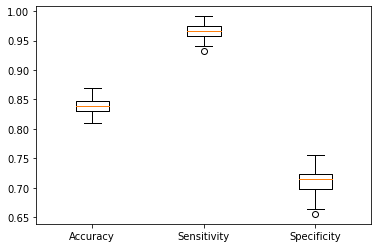

Drop: Rain48
input data - ['Rain24' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8302966101694916
Sensitivity :  0.9703418803418803
Specificity :  0.6926050420168067


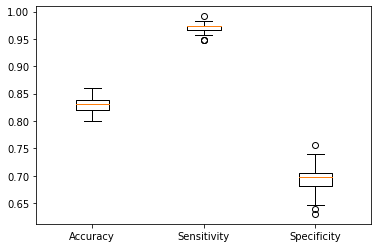

Drop: Rain72
input data - ['Rain24' 'Rain48' 'RainWA' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8229661016949155
Sensitivity :  0.9683760683760684
Specificity :  0.6800000000000002


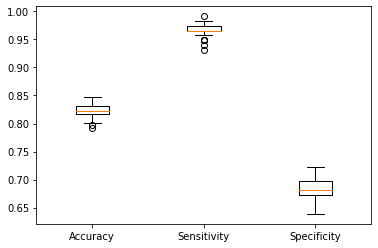

Drop: RainWA
input data - ['Rain24' 'Rain48' 'Rain72' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8282203389830508
Sensitivity :  0.967179487179487
Specificity :  0.6915966386554622


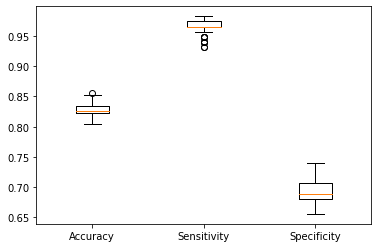

Drop: Wspeed
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8211016949152543
Sensitivity :  0.9329914529914529
Specificity :  0.7110924369747899


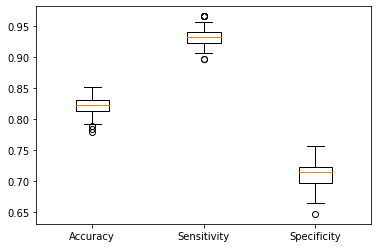

Drop: Solarhours
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'BeachType' 'BeachDirection'
 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8145338983050847
Sensitivity :  0.9201709401709401
Specificity :  0.7106722689075631


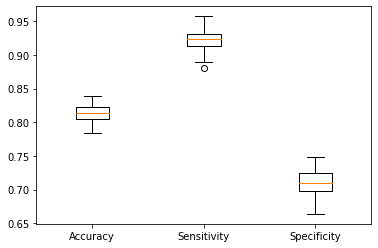

Drop: BeachType
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8308898305084746
Sensitivity :  0.9750427350427348
Specificity :  0.6891596638655462


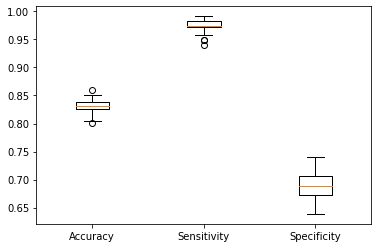

Drop: BeachDirection
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachType'
 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8149152542372882
Sensitivity :  0.9687179487179489
Specificity :  0.6636974789915966


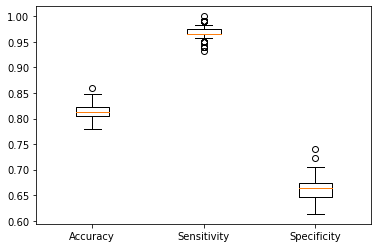

Drop: Wspeed_level
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8271610169491527
Sensitivity :  0.9657264957264958
Specificity :  0.6909243697478992


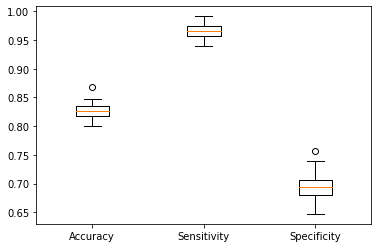

Drop: Wdirection_level
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.8498305084745761
Sensitivity :  0.9725641025641025
Specificity :  0.7291596638655463


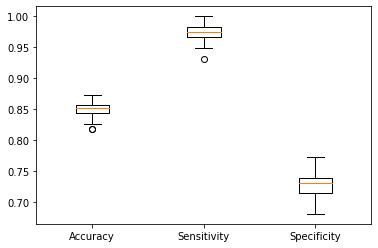

Drop: on_offshore
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachType'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level']
Overall accuracy :  0.8233050847457626
Sensitivity :  0.9666666666666666
Specificity :  0.6823529411764706


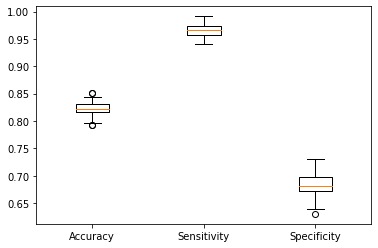

Best sensitivity:  0.9750427350427348 after drop  ['Wdirection', 'BeachType']
Best accuracy:  0.8498305084745761 after drop  ['Wdirection', 'Wdirection_level']


In [10]:
### KNN with ADASYN balanced data - based on best sensitivity - drop second parameter one each time to compare
print("KNN (n=5) model with ADASYN (n=10) balanced data----Best sensitivity drop", bsd)
data_frame2 = data_frame.drop(columns=bsd)
c = data_frame2.columns
c = c.delete(0)
for col in c:
    print("Drop:", col)
    input_data = data_frame2.drop(columns=[str(col),'Entero_level'])
    entero_data = data_frame['Entero_level']
    print("input data -", end =" ")
    print(input_data.columns.values)
    # Separate real above and real below data
    index_above = (data_frame2['Entero_level']==1)
    index_below = (data_frame2['Entero_level']==0)
    input_real_above_data = data_frame2[index_above]
    input_real_below_data = data_frame2[index_below]

    # Use real above data form testset above data
    testset_above_data = input_real_above_data.drop(columns=['Entero_level',str(col)])
    water_above_label = input_real_above_data.iloc[:,0]
    
    # ADASYN
    ada = ADASYN(sampling_strategy=1, n_neighbors=10)

    # For loop
    j=np.zeros(100)
    sen=np.zeros(100)
    spe=np.zeros(100)
    for i in range(100):
        # Generate synthetic sampling data with ADASYN
        data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
        x=pd.DataFrame(data_fake, columns=input_data.columns)
        y=pd.DataFrame(entero_fake, columns=['Entero_level'])
        x['Entero_level']=y['Entero_level'].values
        data_fake_frame=x.query("Entero_level == 1")
        data_fake_frame=data_fake_frame.reset_index(drop=True)
        #data_fake_frame.describe()
    
        # Use synthetic data to form trainset above data
        input_fake_data = data_fake_frame.iloc[:,0:-1]
        water_fake_label = data_fake_frame.iloc[:,-1]
    
        # Split the real below data randomly - test set size matches real above data size
        input_real_data = input_real_below_data.drop(columns=['Entero_level',str(col)])
        entero_real_data = input_real_below_data.iloc[:,0]
        trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
        # Use fake above data plus real below data to form trainset
        trainset_data = np.vstack((input_fake_data, trainset_below_data))
        trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
        
        # Use real above data plus same amount of real below data to form testset
        testset_data = np.vstack((testset_above_data, testset_below_data))
        testset_labels = np.hstack((water_above_label, testset_below_labels))
    
        # Train data normalization
        sc = preprocessing.Normalizer().fit(trainset_data)
        trainset_data = sc.transform(trainset_data)
        testset_data = sc.transform(testset_data)
    
        # Run KNN with sklearn
        knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
        knn.fit(trainset_data, trainset_labels)
        
        cm1 = confusion_matrix(testset_labels,knn.predict(testset_data))
        total1=sum(sum(cm1))
        #####from confusion matrix calculate accuracy
        j[i] = (cm1[0,0]+cm1[1,1])/total1
        sen[i] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        spe[i] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        i=i+1
    
    #End of loop

    # Show the KNN result
    print ('Overall accuracy : ', j.mean())
    print('Sensitivity : ', sen.mean())
    print('Specificity : ', spe.mean())
    if sen.mean()>best_sen:
        best_sen=sen.mean()
        best_sen_drop=bsd+list([col])
    if j.mean()>best_acc:
        best_acc=j.mean()
        best_acc_drop=bsd+list([col])
    plt.boxplot([j, sen, spe])
    plt.xticks([1, 2, 3], ["Accuracy","Sensitivity", "Specificity"])
    plt.show()
#End of loop

print('Best sensitivity: ',best_sen, 'after drop ', best_sen_drop)
print('Best accuracy: ', best_acc, 'after drop ', best_acc_drop)

In [11]:
# Pass best_sen_drop and best_acc_drop
bsd = best_sen_drop
bad = best_acc_drop

KNN (n=5) model with ADASYN (n=10) balanced data----Best sensitivity drop ['Wdirection', 'BeachType']
Drop: Rain24
input data - ['Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection'
 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8349152542372882
Sensitivity :  0.9757264957264955
Specificity :  0.6964705882352941


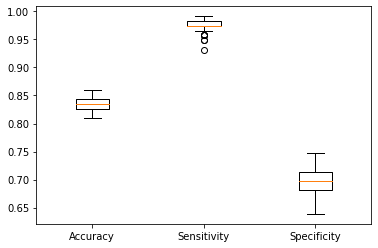

Drop: Rain48
input data - ['Rain24' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection'
 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8330084745762713
Sensitivity :  0.9757264957264957
Specificity :  0.6926890756302521


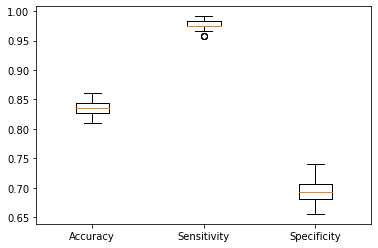

Drop: Rain72
input data - ['Rain24' 'Rain48' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection'
 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.824449152542373
Sensitivity :  0.9756410256410255
Specificity :  0.6757983193277313


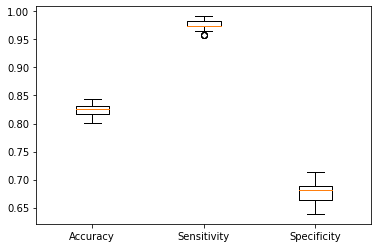

Drop: RainWA
input data - ['Rain24' 'Rain48' 'Rain72' 'Wspeed' 'Solarhours' 'BeachDirection'
 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8335593220338984
Sensitivity :  0.9765811965811966
Specificity :  0.6929411764705884


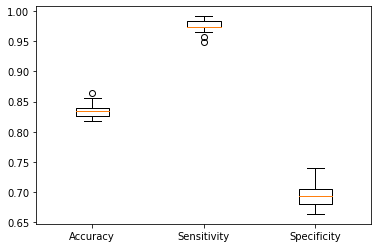

Drop: Wspeed
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Solarhours' 'BeachDirection'
 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8200423728813558
Sensitivity :  0.9382905982905982
Specificity :  0.703781512605042


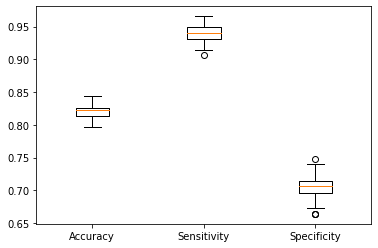

Drop: Solarhours
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'BeachDirection'
 'Wspeed_level' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8227542372881357
Sensitivity :  0.9336752136752137
Specificity :  0.7136974789915967


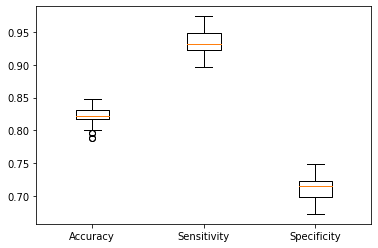

Drop: BeachDirection
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'Wspeed_level'
 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8052542372881356
Sensitivity :  0.9294871794871795
Specificity :  0.683109243697479


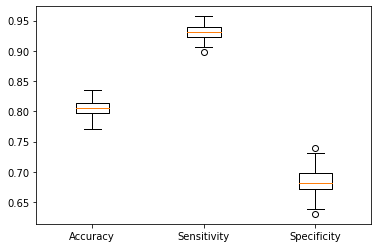

Drop: Wspeed_level
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours'
 'BeachDirection' 'Wdirection_level' 'on_offshore']
Overall accuracy :  0.8288559322033899
Sensitivity :  0.9738461538461537
Specificity :  0.6863025210084034


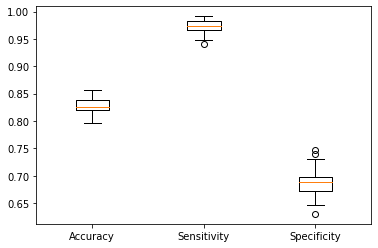

Drop: Wdirection_level
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours'
 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.8472881355932205
Sensitivity :  0.9797435897435897
Specificity :  0.7170588235294119


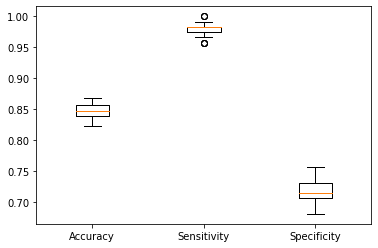

Drop: on_offshore
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours'
 'BeachDirection' 'Wspeed_level' 'Wdirection_level']
Overall accuracy :  0.8213559322033899
Sensitivity :  0.9693162393162392
Specificity :  0.6758823529411765


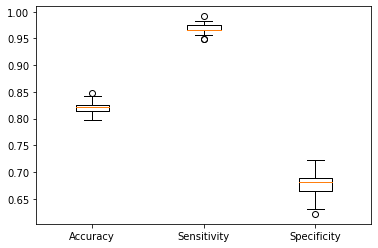

Best sensitivity:  0.9797435897435897 after drop  ['Wdirection', 'BeachType', 'Wdirection_level']
Best accuracy:  0.8498305084745761 after drop  ['Wdirection', 'Wdirection_level']


In [12]:
### KNN with ADASYN balanced data - based on best sensitivity - drop third parameter one each time to compare
print("KNN (n=5) model with ADASYN (n=10) balanced data----Best sensitivity drop", bsd)
data_frame2 = data_frame.drop(columns=bsd)
c = data_frame2.columns
c = c.delete(0)
for col in c:
    print("Drop:", col)
    input_data = data_frame2.drop(columns=[str(col),'Entero_level'])
    entero_data = data_frame['Entero_level']
    print("input data -", end =" ")
    print(input_data.columns.values)
    # Separate real above and real below data
    index_above = (data_frame2['Entero_level']==1)
    index_below = (data_frame2['Entero_level']==0)
    input_real_above_data = data_frame2[index_above]
    input_real_below_data = data_frame2[index_below]

    # Use real above data form testset above data
    testset_above_data = input_real_above_data.drop(columns=['Entero_level',str(col)])
    water_above_label = input_real_above_data.iloc[:,0]
    
    # ADASYN
    ada = ADASYN(sampling_strategy=1, n_neighbors=10)

    # For loop
    j=np.zeros(100)
    sen=np.zeros(100)
    spe=np.zeros(100)
    for i in range(100):
        # Generate synthetic sampling data with ADASYN
        data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
        x=pd.DataFrame(data_fake, columns=input_data.columns)
        y=pd.DataFrame(entero_fake, columns=['Entero_level'])
        x['Entero_level']=y['Entero_level'].values
        data_fake_frame=x.query("Entero_level == 1")
        data_fake_frame=data_fake_frame.reset_index(drop=True)
        #data_fake_frame.describe()
    
        # Use synthetic data to form trainset above data
        input_fake_data = data_fake_frame.iloc[:,0:-1]
        water_fake_label = data_fake_frame.iloc[:,-1]
    
        # Split the real below data randomly - test set size matches real above data size
        input_real_data = input_real_below_data.drop(columns=['Entero_level',str(col)])
        entero_real_data = input_real_below_data.iloc[:,0]
        trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
        # Use fake above data plus real below data to form trainset
        trainset_data = np.vstack((input_fake_data, trainset_below_data))
        trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
        
        # Use real above data plus same amount of real below data to form testset
        testset_data = np.vstack((testset_above_data, testset_below_data))
        testset_labels = np.hstack((water_above_label, testset_below_labels))
    
        # Train data normalization
        sc = preprocessing.Normalizer().fit(trainset_data)
        trainset_data = sc.transform(trainset_data)
        testset_data = sc.transform(testset_data)
    
        # Run KNN with sklearn
        knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
        knn.fit(trainset_data, trainset_labels)
        
        cm1 = confusion_matrix(testset_labels,knn.predict(testset_data))
        total1=sum(sum(cm1))
        #####from confusion matrix calculate accuracy
        j[i] = (cm1[0,0]+cm1[1,1])/total1
        sen[i] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        spe[i] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        i=i+1
    
    #End of loop

    # Show the KNN result
    print ('Overall accuracy : ', j.mean())
    print('Sensitivity : ', sen.mean())
    print('Specificity : ', spe.mean())
    if sen.mean()>best_sen:
        best_sen=sen.mean()
        best_sen_drop=bsd+list([col])
    if j.mean()>best_acc:
        best_acc=j.mean()
        best_acc_drop=bsd+list([col])
    plt.boxplot([j, sen, spe])
    plt.xticks([1, 2, 3], ["Accuracy","Sensitivity", "Specificity"])
    plt.show()
#End of loop

print('Best sensitivity: ',best_sen, 'after drop ', best_sen_drop)
print('Best accuracy: ', best_acc, 'after drop ', best_acc_drop)

In [13]:
# Pass best_sen_drop and best_acc_drop
bsd = best_sen_drop
bad = best_acc_drop

KNN (n=5) model with ADASYN (n=10) balanced data----Best sensitivity drop ['Wdirection', 'BeachType', 'Wdirection_level']
Drop: Rain24
input data - ['Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection'
 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.8378389830508474
Sensitivity :  0.9788888888888887
Specificity :  0.6991596638655463


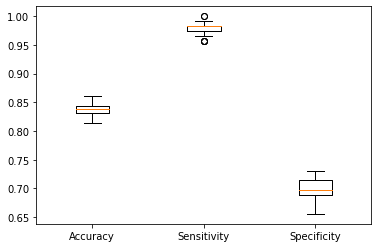

Drop: Rain48
input data - ['Rain24' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection'
 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.8419915254237289
Sensitivity :  0.9810256410256408
Specificity :  0.7052941176470588


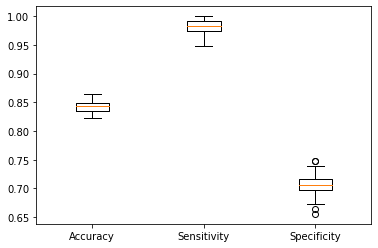

Drop: Rain72
input data - ['Rain24' 'Rain48' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection'
 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.8456779661016947
Sensitivity :  0.982991452991453
Specificity :  0.7106722689075631


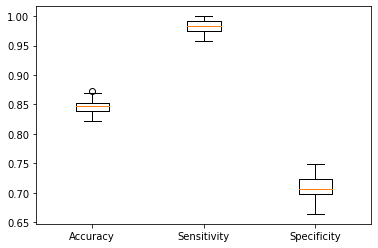

Drop: RainWA
input data - ['Rain24' 'Rain48' 'Rain72' 'Wspeed' 'Solarhours' 'BeachDirection'
 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.8561016949152541
Sensitivity :  0.9819658119658119
Specificity :  0.7323529411764704


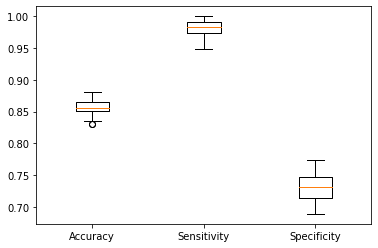

Drop: Wspeed
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Solarhours' 'BeachDirection'
 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.830635593220339
Sensitivity :  0.9197435897435898
Specificity :  0.7430252100840334


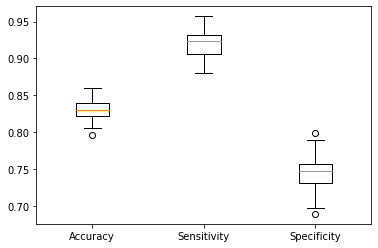

Drop: Solarhours
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'BeachDirection'
 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.8197457627118645
Sensitivity :  0.9294017094017096
Specificity :  0.7119327731092436


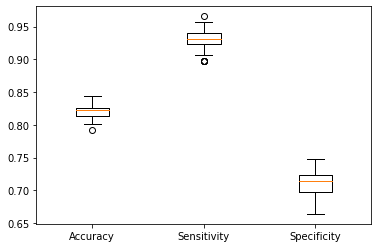

Drop: BeachDirection
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours' 'Wspeed_level'
 'on_offshore']
Overall accuracy :  0.8316525423728812
Sensitivity :  0.956068376068376
Specificity :  0.709327731092437


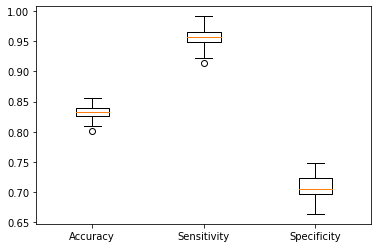

Drop: Wspeed_level
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours'
 'BeachDirection' 'on_offshore']
Overall accuracy :  0.8398305084745763
Sensitivity :  0.9772649572649574
Specificity :  0.7047058823529413


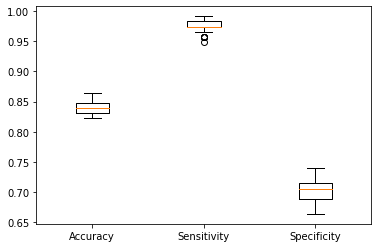

Drop: on_offshore
input data - ['Rain24' 'Rain48' 'Rain72' 'RainWA' 'Wspeed' 'Solarhours'
 'BeachDirection' 'Wspeed_level']
Overall accuracy :  0.8475423728813557
Sensitivity :  0.9687179487179486
Specificity :  0.7284033613445378


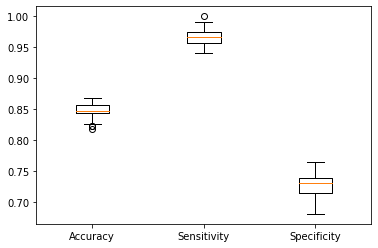

Best sensitivity:  0.982991452991453 after drop  ['Wdirection', 'BeachType', 'Wdirection_level', 'Rain72']
Best accuracy:  0.8561016949152541 after drop  ['Wdirection', 'BeachType', 'Wdirection_level', 'RainWA']


In [14]:
### KNN with ADASYN balanced data - based on best sensitivity - drop fourth parameter one each time to compare
print("KNN (n=5) model with ADASYN (n=10) balanced data----Best sensitivity drop", bsd)
data_frame2 = data_frame.drop(columns=bsd)
c = data_frame2.columns
c = c.delete(0)
for col in c:
    print("Drop:", col)
    input_data = data_frame2.drop(columns=[str(col),'Entero_level'])
    entero_data = data_frame['Entero_level']
    print("input data -", end =" ")
    print(input_data.columns.values)
    # Separate real above and real below data
    index_above = (data_frame2['Entero_level']==1)
    index_below = (data_frame2['Entero_level']==0)
    input_real_above_data = data_frame2[index_above]
    input_real_below_data = data_frame2[index_below]

    # Use real above data form testset above data
    testset_above_data = input_real_above_data.drop(columns=['Entero_level',str(col)])
    water_above_label = input_real_above_data.iloc[:,0]
    
    # ADASYN
    ada = ADASYN(sampling_strategy=1, n_neighbors=10)

    # For loop
    j=np.zeros(100)
    sen=np.zeros(100)
    spe=np.zeros(100)
    for i in range(100):
        # Generate synthetic sampling data with ADASYN
        data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
        x=pd.DataFrame(data_fake, columns=input_data.columns)
        y=pd.DataFrame(entero_fake, columns=['Entero_level'])
        x['Entero_level']=y['Entero_level'].values
        data_fake_frame=x.query("Entero_level == 1")
        data_fake_frame=data_fake_frame.reset_index(drop=True)
        #data_fake_frame.describe()
    
        # Use synthetic data to form trainset above data
        input_fake_data = data_fake_frame.iloc[:,0:-1]
        water_fake_label = data_fake_frame.iloc[:,-1]
    
        # Split the real below data randomly - test set size matches real above data size
        input_real_data = input_real_below_data.drop(columns=['Entero_level',str(col)])
        entero_real_data = input_real_below_data.iloc[:,0]
        trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
        # Use fake above data plus real below data to form trainset
        trainset_data = np.vstack((input_fake_data, trainset_below_data))
        trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
        
        # Use real above data plus same amount of real below data to form testset
        testset_data = np.vstack((testset_above_data, testset_below_data))
        testset_labels = np.hstack((water_above_label, testset_below_labels))
    
        # Train data normalization
        sc = preprocessing.Normalizer().fit(trainset_data)
        trainset_data = sc.transform(trainset_data)
        testset_data = sc.transform(testset_data)
    
        # Run KNN with sklearn
        knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
        knn.fit(trainset_data, trainset_labels)
        
        cm1 = confusion_matrix(testset_labels,knn.predict(testset_data))
        total1=sum(sum(cm1))
        #####from confusion matrix calculate accuracy
        j[i] = (cm1[0,0]+cm1[1,1])/total1
        sen[i] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        spe[i] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        i=i+1
    
    #End of loop

    # Show the KNN result
    print ('Overall accuracy : ', j.mean())
    print('Sensitivity : ', sen.mean())
    print('Specificity : ', spe.mean())
    if sen.mean()>best_sen:
        best_sen=sen.mean()
        best_sen_drop=bsd+list([col])
    if j.mean()>best_acc:
        best_acc=j.mean()
        best_acc_drop=bsd+list([col])
    plt.boxplot([j, sen, spe])
    plt.xticks([1, 2, 3], ["Accuracy","Sensitivity", "Specificity"])
    plt.show()
#End of loop

print('Best sensitivity: ',best_sen, 'after drop ', best_sen_drop)
print('Best accuracy: ', best_acc, 'after drop ', best_acc_drop)

In [15]:
# Pass best_sen_drop and best_acc_drop
bsd = best_sen_drop
bad = best_acc_drop

KNN (n=5) model with ADASYN (n=10) balanced data----Best sensitivity drop ['Wdirection', 'BeachType', 'Wdirection_level', 'Rain72']
Drop: Rain24
input data - ['Rain48' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection' 'Wspeed_level'
 'on_offshore']
Overall accuracy :  0.8366101694915252
Sensitivity :  0.9813675213675213
Specificity :  0.6942857142857143


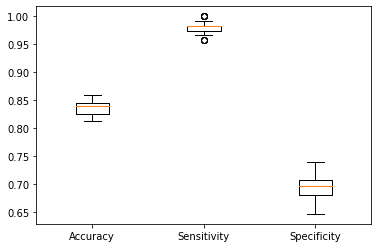

Drop: Rain48
input data - ['Rain24' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection' 'Wspeed_level'
 'on_offshore']
Overall accuracy :  0.8596610169491526
Sensitivity :  0.9792307692307692
Specificity :  0.7421008403361345


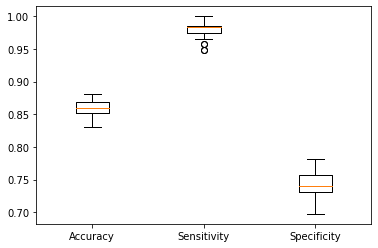

Drop: RainWA
input data - ['Rain24' 'Rain48' 'Wspeed' 'Solarhours' 'BeachDirection' 'Wspeed_level'
 'on_offshore']
Overall accuracy :  0.8443644067796611
Sensitivity :  0.968034188034188
Specificity :  0.7227731092436975


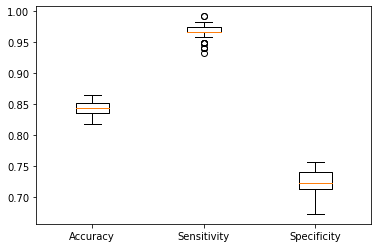

Drop: Wspeed
input data - ['Rain24' 'Rain48' 'RainWA' 'Solarhours' 'BeachDirection' 'Wspeed_level'
 'on_offshore']
Overall accuracy :  0.8305932203389829
Sensitivity :  0.9200854700854701
Specificity :  0.7426050420168068


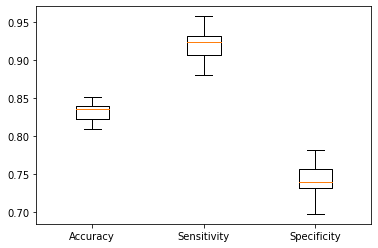

Drop: Solarhours
input data - ['Rain24' 'Rain48' 'RainWA' 'Wspeed' 'BeachDirection' 'Wspeed_level'
 'on_offshore']
Overall accuracy :  0.8169067796610169
Sensitivity :  0.9208547008547009
Specificity :  0.7147058823529412


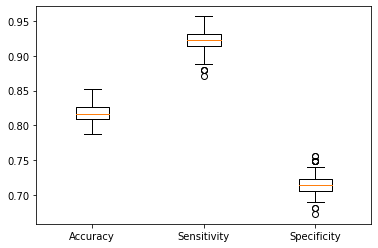

Drop: BeachDirection
input data - ['Rain24' 'Rain48' 'RainWA' 'Wspeed' 'Solarhours' 'Wspeed_level'
 'on_offshore']
Overall accuracy :  0.8227966101694915
Sensitivity :  0.9570940170940169
Specificity :  0.6907563025210084


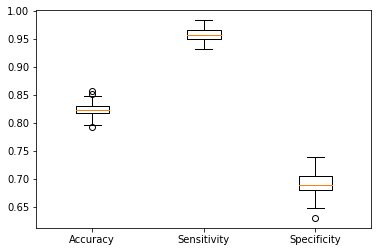

Drop: Wspeed_level
input data - ['Rain24' 'Rain48' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection'
 'on_offshore']
Overall accuracy :  0.8403813559322033
Sensitivity :  0.9788034188034187
Specificity :  0.7042857142857144


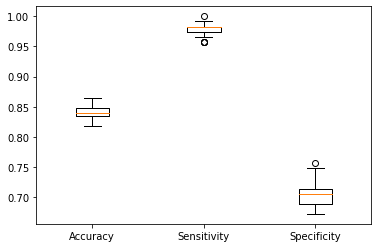

Drop: on_offshore
input data - ['Rain24' 'Rain48' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection'
 'Wspeed_level']
Overall accuracy :  0.8443644067796611
Sensitivity :  0.9723931623931622
Specificity :  0.7184873949579833


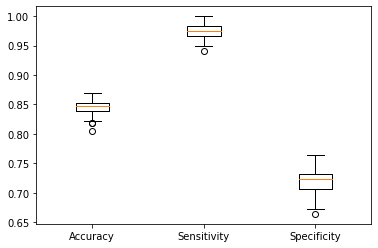

Best sensitivity:  0.982991452991453 after drop  ['Wdirection', 'BeachType', 'Wdirection_level', 'Rain72']
Best accuracy:  0.8596610169491526 after drop  ['Wdirection', 'BeachType', 'Wdirection_level', 'Rain72', 'Rain48']


In [16]:
### KNN with ADASYN balanced data - based on best sensitivity - drop fifth parameter one each time to compare
print("KNN (n=5) model with ADASYN (n=10) balanced data----Best sensitivity drop", bsd)
data_frame2 = data_frame.drop(columns=bsd)
c = data_frame2.columns
c = c.delete(0)
for col in c:
    print("Drop:", col)
    input_data = data_frame2.drop(columns=[str(col),'Entero_level'])
    entero_data = data_frame['Entero_level']
    print("input data -", end =" ")
    print(input_data.columns.values)
    # Separate real above and real below data
    index_above = (data_frame2['Entero_level']==1)
    index_below = (data_frame2['Entero_level']==0)
    input_real_above_data = data_frame2[index_above]
    input_real_below_data = data_frame2[index_below]

    # Use real above data form testset above data
    testset_above_data = input_real_above_data.drop(columns=['Entero_level',str(col)])
    water_above_label = input_real_above_data.iloc[:,0]
    
    # ADASYN
    ada = ADASYN(sampling_strategy=1, n_neighbors=10)

    # For loop
    j=np.zeros(100)
    sen=np.zeros(100)
    spe=np.zeros(100)
    for i in range(100):
        # Generate synthetic sampling data with ADASYN
        data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
        x=pd.DataFrame(data_fake, columns=input_data.columns)
        y=pd.DataFrame(entero_fake, columns=['Entero_level'])
        x['Entero_level']=y['Entero_level'].values
        data_fake_frame=x.query("Entero_level == 1")
        data_fake_frame=data_fake_frame.reset_index(drop=True)
        #data_fake_frame.describe()
    
        # Use synthetic data to form trainset above data
        input_fake_data = data_fake_frame.iloc[:,0:-1]
        water_fake_label = data_fake_frame.iloc[:,-1]
    
        # Split the real below data randomly - test set size matches real above data size
        input_real_data = input_real_below_data.drop(columns=['Entero_level',str(col)])
        entero_real_data = input_real_below_data.iloc[:,0]
        trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
        # Use fake above data plus real below data to form trainset
        trainset_data = np.vstack((input_fake_data, trainset_below_data))
        trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
        
        # Use real above data plus same amount of real below data to form testset
        testset_data = np.vstack((testset_above_data, testset_below_data))
        testset_labels = np.hstack((water_above_label, testset_below_labels))
    
        # Train data normalization
        sc = preprocessing.Normalizer().fit(trainset_data)
        trainset_data = sc.transform(trainset_data)
        testset_data = sc.transform(testset_data)
    
        # Run KNN with sklearn
        knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
        knn.fit(trainset_data, trainset_labels)
        
        cm1 = confusion_matrix(testset_labels,knn.predict(testset_data))
        total1=sum(sum(cm1))
        #####from confusion matrix calculate accuracy
        j[i] = (cm1[0,0]+cm1[1,1])/total1
        sen[i] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        spe[i] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        i=i+1
    
    #End of loop

    # Show the KNN result
    print ('Overall accuracy : ', j.mean())
    print('Sensitivity : ', sen.mean())
    print('Specificity : ', spe.mean())
    if sen.mean()>best_sen:
        best_sen=sen.mean()
        best_sen_drop=bsd+list([col])
    if j.mean()>best_acc:
        best_acc=j.mean()
        best_acc_drop=bsd+list([col])
    plt.boxplot([j, sen, spe])
    plt.xticks([1, 2, 3], ["Accuracy","Sensitivity", "Specificity"])
    plt.show()
#End of loop

print('Best sensitivity: ',best_sen, 'after drop ', best_sen_drop)
print('Best accuracy: ', best_acc, 'after drop ', best_acc_drop)

In [17]:
# Pass best_sen_drop and best_acc_drop
bsd = best_sen_drop
bad = best_acc_drop

KNN (n=5) model with ADASYN (n=10) balanced data----Best accuracy drop ['Wdirection', 'BeachType', 'Wdirection_level', 'Rain72', 'Rain48']
Drop: Rain24
input data - ['RainWA' 'Wspeed' 'Solarhours' 'BeachDirection' 'Wspeed_level'
 'on_offshore']
Overall accuracy :  0.849957627118644
Sensitivity :  0.9748717948717947
Specificity :  0.7271428571428571


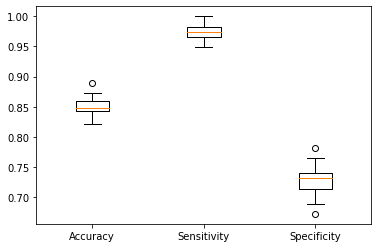

Drop: RainWA
input data - ['Rain24' 'Wspeed' 'Solarhours' 'BeachDirection' 'Wspeed_level'
 'on_offshore']
Overall accuracy :  0.8425423728813558
Sensitivity :  0.9446153846153846
Specificity :  0.7421848739495798


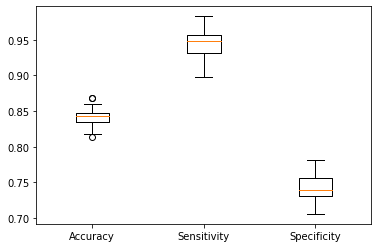

Drop: Wspeed
input data - ['Rain24' 'RainWA' 'Solarhours' 'BeachDirection' 'Wspeed_level'
 'on_offshore']
Overall accuracy :  0.8302966101694915
Sensitivity :  0.9093162393162393
Specificity :  0.7526050420168066


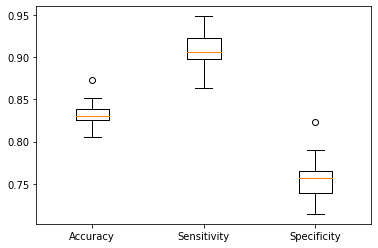

Drop: Solarhours
input data - ['Rain24' 'RainWA' 'Wspeed' 'BeachDirection' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.8241525423728814
Sensitivity :  0.9290598290598291
Specificity :  0.7210084033613446


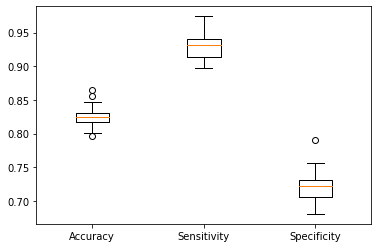

Drop: BeachDirection
input data - ['Rain24' 'RainWA' 'Wspeed' 'Solarhours' 'Wspeed_level' 'on_offshore']
Overall accuracy :  0.8070762711864407
Sensitivity :  0.9514529914529914
Specificity :  0.665126050420168


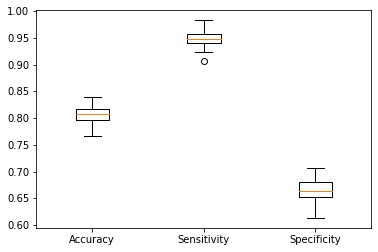

Drop: Wspeed_level
input data - ['Rain24' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection' 'on_offshore']
Overall accuracy :  0.8509745762711863
Sensitivity :  0.9764102564102564
Specificity :  0.7276470588235293


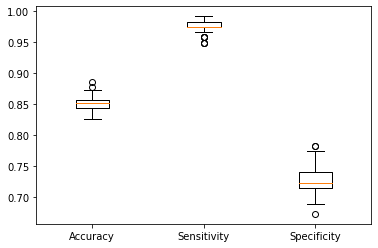

Drop: on_offshore
input data - ['Rain24' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection' 'Wspeed_level']
Overall accuracy :  0.8614830508474575
Sensitivity :  0.9705128205128204
Specificity :  0.7542857142857141


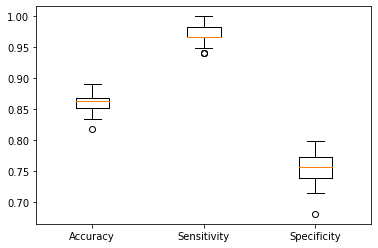

Best sensitivity:  0.982991452991453 after drop  ['Wdirection', 'BeachType', 'Wdirection_level', 'Rain72']
Best accuracy:  0.8614830508474575 after drop  ['Wdirection', 'BeachType', 'Wdirection_level', 'Rain72', 'Rain48', 'on_offshore']


In [18]:
### KNN with ADASYN balanced data - based on best accuracy - drop sixth parameter one each time to compare (no improvement in best sensitivity from dropping extra parameter)
print("KNN (n=5) model with ADASYN (n=10) balanced data----Best accuracy drop", bad)
data_frame2 = data_frame.drop(columns=bad)
c = data_frame2.columns
c = c.delete(0)
for col in c:
    print("Drop:", col)
    input_data = data_frame2.drop(columns=[str(col),'Entero_level'])
    entero_data = data_frame['Entero_level']
    print("input data -", end =" ")
    print(input_data.columns.values)
    # Separate real above and real below data
    index_above = (data_frame2['Entero_level']==1)
    index_below = (data_frame2['Entero_level']==0)
    input_real_above_data = data_frame2[index_above]
    input_real_below_data = data_frame2[index_below]

    # Use real above data form testset above data
    testset_above_data = input_real_above_data.drop(columns=['Entero_level',str(col)])
    water_above_label = input_real_above_data.iloc[:,0]
    
    # ADASYN
    ada = ADASYN(sampling_strategy=1, n_neighbors=10)

    # For loop
    j=np.zeros(100)
    sen=np.zeros(100)
    spe=np.zeros(100)
    for i in range(100):
        # Generate synthetic sampling data with ADASYN
        data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
        x=pd.DataFrame(data_fake, columns=input_data.columns)
        y=pd.DataFrame(entero_fake, columns=['Entero_level'])
        x['Entero_level']=y['Entero_level'].values
        data_fake_frame=x.query("Entero_level == 1")
        data_fake_frame=data_fake_frame.reset_index(drop=True)
        #data_fake_frame.describe()
    
        # Use synthetic data to form trainset above data
        input_fake_data = data_fake_frame.iloc[:,0:-1]
        water_fake_label = data_fake_frame.iloc[:,-1]
    
        # Split the real below data randomly - test set size matches real above data size
        input_real_data = input_real_below_data.drop(columns=['Entero_level',str(col)])
        entero_real_data = input_real_below_data.iloc[:,0]
        trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
        # Use fake above data plus real below data to form trainset
        trainset_data = np.vstack((input_fake_data, trainset_below_data))
        trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
        
        # Use real above data plus same amount of real below data to form testset
        testset_data = np.vstack((testset_above_data, testset_below_data))
        testset_labels = np.hstack((water_above_label, testset_below_labels))
    
        # Train data normalization
        sc = preprocessing.Normalizer().fit(trainset_data)
        trainset_data = sc.transform(trainset_data)
        testset_data = sc.transform(testset_data)
    
        # Run KNN with sklearn
        knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
        knn.fit(trainset_data, trainset_labels)
        
        cm1 = confusion_matrix(testset_labels,knn.predict(testset_data))
        total1=sum(sum(cm1))
        #####from confusion matrix calculate accuracy
        j[i] = (cm1[0,0]+cm1[1,1])/total1
        sen[i] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        spe[i] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        i=i+1
    
    #End of loop

    # Show the KNN result
    print ('Overall accuracy : ', j.mean())
    print('Sensitivity : ', sen.mean())
    print('Specificity : ', spe.mean())
    if sen.mean()>best_sen:
        best_sen=sen.mean()
        best_sen_drop=bad+list([col])
    if j.mean()>best_acc:
        best_acc=j.mean()
        best_acc_drop=bad+list([col])
    plt.boxplot([j, sen, spe])
    plt.xticks([1, 2, 3], ["Accuracy","Sensitivity", "Specificity"])
    plt.show()
#End of loop

print('Best sensitivity: ',best_sen, 'after drop ', best_sen_drop)
print('Best accuracy: ', best_acc, 'after drop ', best_acc_drop)

In [19]:
# Pass best_sen_drop and best_acc_drop
bsd = best_sen_drop
bad = best_acc_drop

KNN (n=5) model with ADASYN (n=10) balanced data----Best accuracy drop ['Wdirection', 'BeachType', 'Wdirection_level', 'Rain72', 'Rain48', 'on_offshore']
Drop: Rain24
input data - ['RainWA' 'Wspeed' 'Solarhours' 'BeachDirection' 'Wspeed_level']
Overall accuracy :  0.8553813559322033
Sensitivity :  0.9643589743589742
Specificity :  0.7482352941176471


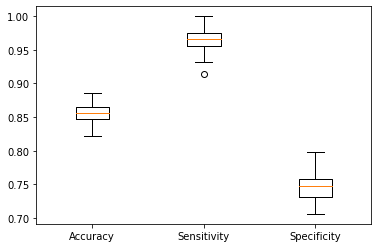

Drop: RainWA
input data - ['Rain24' 'Wspeed' 'Solarhours' 'BeachDirection' 'Wspeed_level']
Overall accuracy :  0.8329237288135594
Sensitivity :  0.9478632478632477
Specificity :  0.7199159663865545


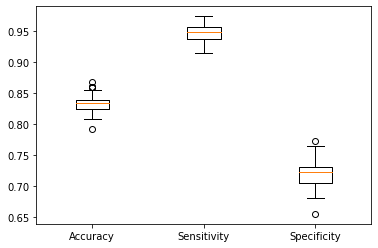

Drop: Wspeed
input data - ['Rain24' 'RainWA' 'Solarhours' 'BeachDirection' 'Wspeed_level']
Overall accuracy :  0.846101694915254
Sensitivity :  0.9003418803418805
Specificity :  0.7927731092436975


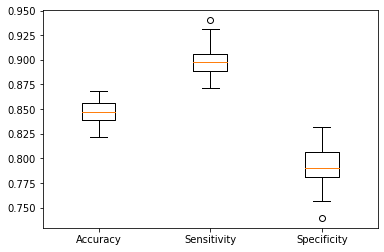

Drop: Solarhours
input data - ['Rain24' 'RainWA' 'Wspeed' 'BeachDirection' 'Wspeed_level']
Overall accuracy :  0.8397457627118645
Sensitivity :  0.877692307692308
Specificity :  0.802436974789916


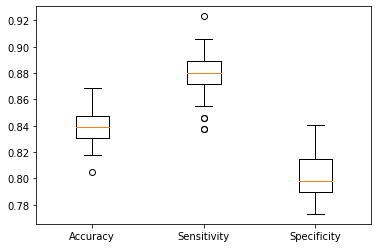

Drop: BeachDirection
input data - ['Rain24' 'RainWA' 'Wspeed' 'Solarhours' 'Wspeed_level']
Overall accuracy :  0.828771186440678
Sensitivity :  0.9496581196581195
Specificity :  0.7099159663865546


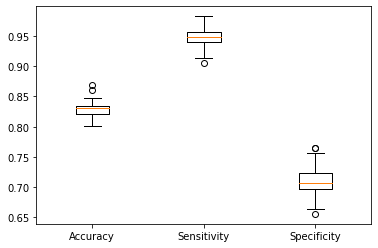

Drop: Wspeed_level
input data - ['Rain24' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection']
Overall accuracy :  0.8522881355932204
Sensitivity :  0.9610256410256409
Specificity :  0.7453781512605043


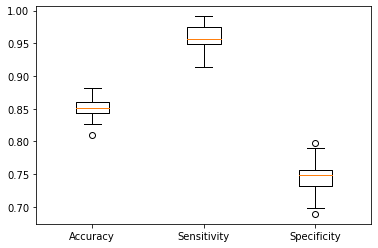

Best sensitivity:  0.982991452991453 after drop  ['Wdirection', 'BeachType', 'Wdirection_level', 'Rain72']
Best accuracy:  0.8614830508474575 after drop  ['Wdirection', 'BeachType', 'Wdirection_level', 'Rain72', 'Rain48', 'on_offshore']


In [20]:
### KNN with ADASYN balanced data - based on best accuracy - drop seventh parameter one each time to compare
print("KNN (n=5) model with ADASYN (n=10) balanced data----Best accuracy drop", bad)
data_frame2 = data_frame.drop(columns=bad)
c = data_frame2.columns
c = c.delete(0)
for col in c:
    print("Drop:", col)
    input_data = data_frame2.drop(columns=[str(col),'Entero_level'])
    entero_data = data_frame['Entero_level']
    print("input data -", end =" ")
    print(input_data.columns.values)
    # Separate real above and real below data
    index_above = (data_frame2['Entero_level']==1)
    index_below = (data_frame2['Entero_level']==0)
    input_real_above_data = data_frame2[index_above]
    input_real_below_data = data_frame2[index_below]

    # Use real above data form testset above data
    testset_above_data = input_real_above_data.drop(columns=['Entero_level',str(col)])
    water_above_label = input_real_above_data.iloc[:,0]
    
    # ADASYN
    ada = ADASYN(sampling_strategy=1, n_neighbors=10)

    # For loop
    j=np.zeros(100)
    sen=np.zeros(100)
    spe=np.zeros(100)
    for i in range(100):
        # Generate synthetic sampling data with ADASYN
        data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
        x=pd.DataFrame(data_fake, columns=input_data.columns)
        y=pd.DataFrame(entero_fake, columns=['Entero_level'])
        x['Entero_level']=y['Entero_level'].values
        data_fake_frame=x.query("Entero_level == 1")
        data_fake_frame=data_fake_frame.reset_index(drop=True)
        #data_fake_frame.describe()
    
        # Use synthetic data to form trainset above data
        input_fake_data = data_fake_frame.iloc[:,0:-1]
        water_fake_label = data_fake_frame.iloc[:,-1]
    
        # Split the real below data randomly - test set size matches real above data size
        input_real_data = input_real_below_data.drop(columns=['Entero_level',str(col)])
        entero_real_data = input_real_below_data.iloc[:,0]
        trainset_below_data, testset_below_data, trainset_below_labels, testset_below_labels = train_test_split(input_real_data, entero_real_data, test_size=ratio, random_state=42)
    
        # Use fake above data plus real below data to form trainset
        trainset_data = np.vstack((input_fake_data, trainset_below_data))
        trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
        
        # Use real above data plus same amount of real below data to form testset
        testset_data = np.vstack((testset_above_data, testset_below_data))
        testset_labels = np.hstack((water_above_label, testset_below_labels))
    
        # Train data normalization
        sc = preprocessing.Normalizer().fit(trainset_data)
        trainset_data = sc.transform(trainset_data)
        testset_data = sc.transform(testset_data)
    
        # Run KNN with sklearn
        knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
        knn.fit(trainset_data, trainset_labels)
        
        cm1 = confusion_matrix(testset_labels,knn.predict(testset_data))
        total1=sum(sum(cm1))
        #####from confusion matrix calculate accuracy
        j[i] = (cm1[0,0]+cm1[1,1])/total1
        sen[i] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        spe[i] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        i=i+1
    
    #End of loop

    # Show the KNN result
    print ('Overall accuracy : ', j.mean())
    print('Sensitivity : ', sen.mean())
    print('Specificity : ', spe.mean())
    if sen.mean()>best_sen:
        best_sen=sen.mean()
        best_sen_drop=bad+list([col])
    if j.mean()>best_acc:
        best_acc=j.mean()
        best_acc_drop=bad+list([col])
    plt.boxplot([j, sen, spe])
    plt.xticks([1, 2, 3], ["Accuracy","Sensitivity", "Specificity"])
    plt.show()
#End of loop

print('Best sensitivity: ',best_sen, 'after drop ', best_sen_drop)
print('Best accuracy: ', best_acc, 'after drop ', best_acc_drop)

In [21]:
print("There are no more improvement from drop additional parameters.")
print('The best sensitivity is: ',best_sen, 'after drop ', best_sen_drop)
print('The best accuracy is: ', best_acc, 'after drop ', best_acc_drop)

There are no more improvement from drop additional parameters.
The best sensitivity is:  0.982991452991453 after drop  ['Wdirection', 'BeachType', 'Wdirection_level', 'Rain72']
The best accuracy is:  0.8614830508474575 after drop  ['Wdirection', 'BeachType', 'Wdirection_level', 'Rain72', 'Rain48', 'on_offshore']


In [22]:
# Best models test on separate test-set

In [23]:
# Import testset
testset = pd.read_csv("PB5_testset.csv")

# Delete columns "DATE","Entero","BeachName"
test_set = testset.drop(columns=['Entero','DATE','BeachName'])

# Move column "Entero_level" to the front
test_set = test_set[ ['Entero_level'] + [ col for col in test_set.columns if col != 'Entero_level' ] ]
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entero_level      201 non-null    int64  
 1   Rain24            201 non-null    float64
 2   Rain48            201 non-null    float64
 3   Rain72            201 non-null    float64
 4   RainWA            201 non-null    float64
 5   Wdirection        201 non-null    int64  
 6   Wspeed            201 non-null    float64
 7   Solarhours        201 non-null    float64
 8   BeachType         201 non-null    int64  
 9   BeachDirection    201 non-null    int64  
 10  Wspeed_level      201 non-null    int64  
 11  Wdirection_level  201 non-null    int64  
 12  on_offshore       201 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 20.5 KB


In [24]:
# Best accuracy model test on separate test-set
input_data = data_frame.drop(columns=['Entero_level'])
input_data = input_data.drop(columns=best_acc_drop)
entero_data = data_frame['Entero_level']
c = input_data.columns
print(input_data.columns.values)

# Separate real above and real below data
index_above = (data_frame['Entero_level']==1)
index_below = (data_frame['Entero_level']==0)
input_real_above_data = data_frame[index_above]
input_real_below_data = data_frame[index_below]

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# Generate synthetic sampling data with ADASYN
data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
x=pd.DataFrame(data_fake, columns=c)
y=pd.DataFrame(entero_fake, columns=['Entero_level'])
x['Entero_level']=y['Entero_level'].values
data_fake_frame=x.query("Entero_level == 1")
data_fake_frame=data_fake_frame.reset_index(drop=True)
#data_fake_frame.describe()
    
# Use synthetic data to form trainset above data
input_fake_data = data_fake_frame.iloc[:,0:-1]
water_fake_label = data_fake_frame.iloc[:,-1]
    
# Use fake above data plus real below data to form trainset
trainset_below_data = input_real_below_data.drop(columns=['Entero_level'])
trainset_below_data = trainset_below_data.drop(columns=best_acc_drop)
trainset_below_labels = input_real_below_data.iloc[:,0]
trainset_data = np.vstack((input_fake_data, trainset_below_data))
trainset_labels = np.hstack((water_fake_label, trainset_below_labels))

# Test set
test_set_data = test_set.drop(columns=['Entero_level'])
test_set_data = test_set_data.drop(columns=best_acc_drop)
test_set_labels = test_set['Entero_level']

# Train/test data normalization
sc = preprocessing.Normalizer().fit(trainset_data)
trainset_data = sc.transform(trainset_data)
test_set_data = sc.transform(test_set_data)
        
# Run KNN with sklearn
knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
knn.fit(trainset_data, trainset_labels)

#print("Overall accuracy:")
#print(accuracy_score(test_set_labels,knn.predict(test_set_data)))
print("Confusion matrix")
print(confusion_matrix(test_set_labels,knn.predict(test_set_data)))

cm1 = confusion_matrix(test_set_labels,knn.predict(test_set_data))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy=(cm1[0,0]+cm1[1,1])/total1
sen = cm1[1,1]/(cm1[1,0]+cm1[1,1])
spe = cm1[0,0]/(cm1[0,0]+cm1[0,1])

print ('Accuracy : ', accuracy)
print('Sensitivity : ', sen)
print('Specificity : ', spe)

['Rain24' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection' 'Wspeed_level']
Confusion matrix
[[112  57]
 [ 16  16]]
Accuracy :  0.6368159203980099
Sensitivity :  0.5
Specificity :  0.6627218934911243


In [25]:
# Best sensitivity model test on separate test-set
best_sen_drop
input_data = data_frame.drop(columns=['Entero_level'])
input_data = input_data.drop(columns=best_sen_drop)
entero_data = data_frame['Entero_level']
c = input_data.columns
print(input_data.columns.values)

# Separate real above and real below data
index_above = (data_frame['Entero_level']==1)
index_below = (data_frame['Entero_level']==0)
input_real_above_data = data_frame[index_above]
input_real_below_data = data_frame[index_below]

# ADASYN
ada = ADASYN(sampling_strategy=1, n_neighbors=10)

# Generate synthetic sampling data with ADASYN
data_fake, entero_fake = ada.fit_resample(input_data, entero_data)
x=pd.DataFrame(data_fake, columns=c)
y=pd.DataFrame(entero_fake, columns=['Entero_level'])
x['Entero_level']=y['Entero_level'].values
data_fake_frame=x.query("Entero_level == 1")
data_fake_frame=data_fake_frame.reset_index(drop=True)
#data_fake_frame.describe()
    
# Use synthetic data to form trainset above data
input_fake_data = data_fake_frame.iloc[:,0:-1]
water_fake_label = data_fake_frame.iloc[:,-1]
    
# Use fake above data plus real below data to form trainset
trainset_below_data = input_real_below_data.drop(columns=['Entero_level'])
trainset_below_data = trainset_below_data.drop(columns=best_sen_drop)
trainset_below_labels = input_real_below_data.iloc[:,0]
trainset_data = np.vstack((input_fake_data, trainset_below_data))
trainset_labels = np.hstack((water_fake_label, trainset_below_labels))

# Test set
test_set_data = test_set.drop(columns=['Entero_level'])
test_set_data = test_set_data.drop(columns=best_sen_drop)
test_set_labels = test_set['Entero_level']

# Train/test data normalization
sc = preprocessing.Normalizer().fit(trainset_data)
trainset_data = sc.transform(trainset_data)
test_set_data = sc.transform(test_set_data)
        
# Run KNN with sklearn
knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')
knn.fit(trainset_data, trainset_labels)

#print("Overall accuracy:")
#print(accuracy_score(test_set_labels,knn.predict(test_set_data)))
print("Confusion matrix")
print(confusion_matrix(test_set_labels,knn.predict(test_set_data)))

cm1 = confusion_matrix(test_set_labels,knn.predict(test_set_data))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy=(cm1[0,0]+cm1[1,1])/total1
sen = cm1[1,1]/(cm1[1,0]+cm1[1,1])
spe = cm1[0,0]/(cm1[0,0]+cm1[0,1])

print ('Accuracy : ', accuracy)
print('Sensitivity : ', sen)
print('Specificity : ', spe)

['Rain24' 'Rain48' 'RainWA' 'Wspeed' 'Solarhours' 'BeachDirection'
 'Wspeed_level' 'on_offshore']
Confusion matrix
[[109  60]
 [ 13  19]]
Accuracy :  0.6368159203980099
Sensitivity :  0.59375
Specificity :  0.6449704142011834
